In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

#### Исследование времени автономного полета ЛА при различной загрузке и типе аккумуляторных батарей
Важным параметром аккумуляторных батарей является удельная энергия $E_{sb}$, измеряемая в $\frac{Wh}{kg}$

1. Для литий полимерных аккумуляторов $E_{sb}$ составляет около 180-200 $\frac{Wh}{kg}$
2. Для литий ионных батарей - 200-240 $\frac{Wh}{kg}$

За высокую удельную энергию литий ионные батареи "платят" малым током отдачи, в то время как литий полимерные имеют значительно большую токоотдачу, но большую массу

Ниже приведем результаты для модели ЛА с оценочным значением аэродинамического качества $\frac{L}{D} = 14$, время полета $E$ оценим по формуле вида

$$E = \frac{L}{D}\frac{E_{sb}\eta_{p}\eta_{s}m_b}{g V (1.8+m_b+m_p)}$$


11.686550634902655 8.611142573086168


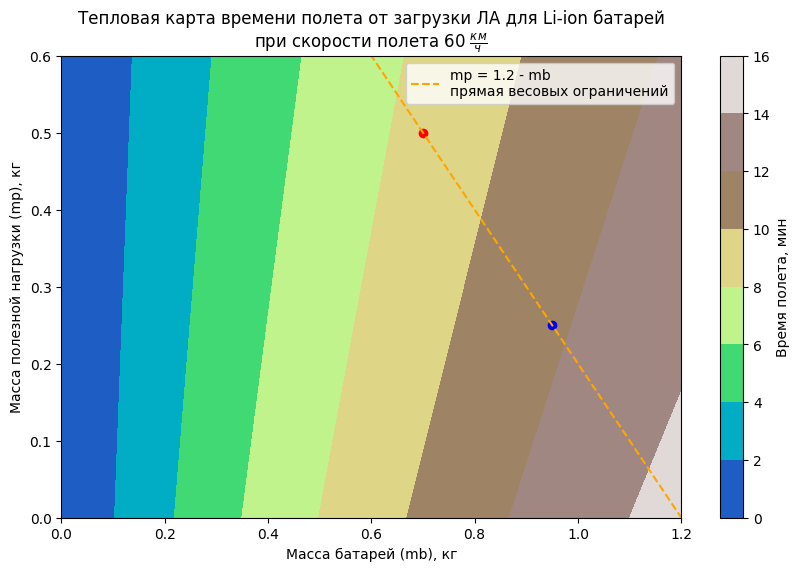

In [6]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
def Endurance(mb, mp, Esb):
    return np.array((10*Esb*0.80*0.85*mb)/(9.81*3.6*64.8*(1.8+mb+mp)))*60
def f1(mb):
    return (-mb + 1.2)

mb = np.linspace(0,1.2,1000)
mp = np.linspace(0,0.6,1000)
X, Y = np.meshgrid(mb, mp)
Z = Endurance(X, Y, 207)
plt.contourf(X, Y, Z, cmap='terrain')
plt.colorbar(label='Время полета, мин')
ax.set_xlabel('Масса батарей (mb), кг')
ax.set_ylabel('Масса полезной нагрузки (mp), кг')
ax.set_title('Тепловая карта времени полета от загрузки ЛА для Li-ion батарей'+'\n'+r'при скорости полета 18 $\frac{м}{с}$')

ax.plot(mb, f1(mb), '--', label = 'mp = 1.2 - mb' + '\n' + 'прямая весовых ограничений', color='orange')
ax.set_ylim(0,0.6)
# ax.set_xlim(0,0.5)
ax.legend()
ax.scatter(0.7, 0.5, c = 'red')
ax.scatter(0.95, 0.25, c = 'blue')
# ax.annotate('полезная нaгрузка 0.25кг', xy=(.95, .25), xytext=(0.5, 0.1), arrowprops=dict(facecolor='white', shrink=0.05))
plt.savefig('heatMapLiIonAppeal.png', pad_inches = 0)
print(Endurance(0.95, 0.25, 207), Endurance(0.7, 0.5, 207))